In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r'D:\Users\703237795\Harsha\Files\Hospital.csv')

In [3]:
data.shape

(113, 12)

In [4]:
data.head()

,ID,Stay,Age,InfctRsk,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


In [5]:
data.dtypes

ID              int64
Stay          float64
Age           float64
InfctRsk      float64
Culture       float64
Xray          float64
Beds            int64
MedSchool       int64
Region          int64
Census          int64
Nurses          int64
Facilities    float64
dtype: object

In [6]:
names=data.columns

In [7]:
data.isna().sum()

ID            0
Stay          0
Age           0
InfctRsk      0
Culture       0
Xray          0
Beds          0
MedSchool     0
Region        0
Census        0
Nurses        0
Facilities    0
dtype: int64

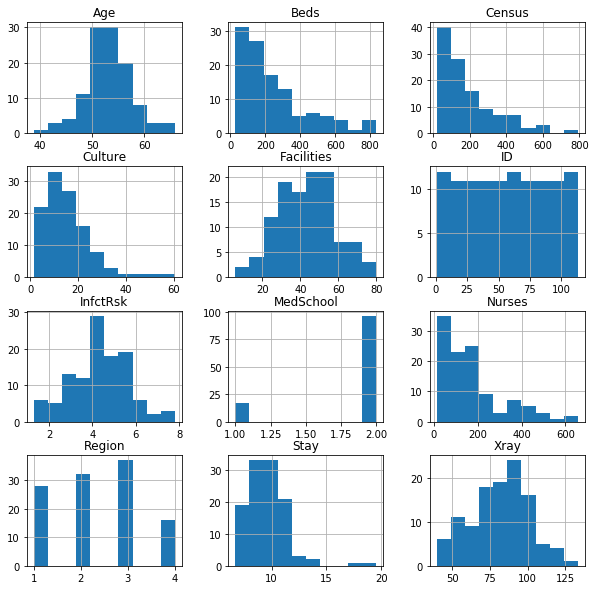

In [8]:
data.hist(figsize=(10,10))
plt.show()

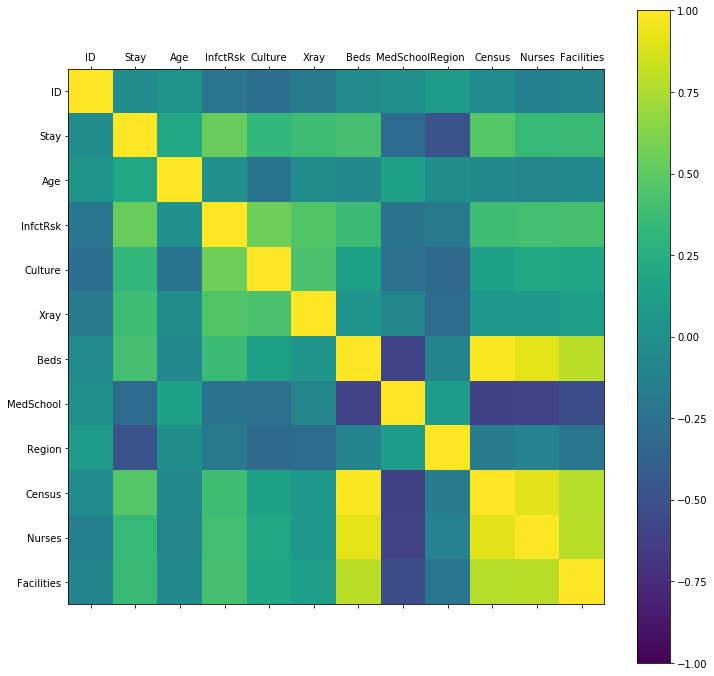

In [9]:
correlations = data.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [10]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Stay,Age,InfctRsk,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
ID,1,-0.0223872,0.037258,-0.211316,-0.267415,-0.16602,-0.0356529,0.00607098,0.101505,-0.027056,-0.133531,-0.0978575
Stay,-0.0223872,1,0.188914,0.533444,0.326684,0.382482,0.409265,-0.296951,-0.49213,0.473885,0.340367,0.355538
Age,0.037258,0.188914,1,0.00109317,-0.225847,-0.0188549,-0.0588232,0.145126,-0.0204319,-0.0547747,-0.0829446,-0.0404514
InfctRsk,-0.211316,0.533444,0.00109317,1,0.559159,0.453392,0.35977,-0.23303,-0.192281,0.381411,0.393981,0.412601
Culture,-0.267415,0.326684,-0.225847,0.559159,1,0.424962,0.139725,-0.242744,-0.308278,0.142948,0.1989,0.185131
Xray,-0.16602,0.382482,-0.0188549,0.453392,0.424962,1,0.04582,-0.0866966,-0.296344,0.0629135,0.0773813,0.111928
Beds,-0.0356529,0.409265,-0.0588232,0.35977,0.139725,0.04582,1,-0.59118,-0.105627,0.980998,0.915504,0.794524
MedSchool,0.00607098,-0.296951,0.145126,-0.23303,-0.242744,-0.0866966,-0.59118,1,0.102668,-0.614757,-0.58824,-0.52439
Region,0.101505,-0.49213,-0.0204319,-0.192281,-0.308278,-0.296344,-0.105627,0.102668,1,-0.152744,-0.112681,-0.211532
Census,-0.027056,0.473885,-0.0547747,0.381411,0.142948,0.0629135,0.980998,-0.614757,-0.152744,1,0.907897,0.778063


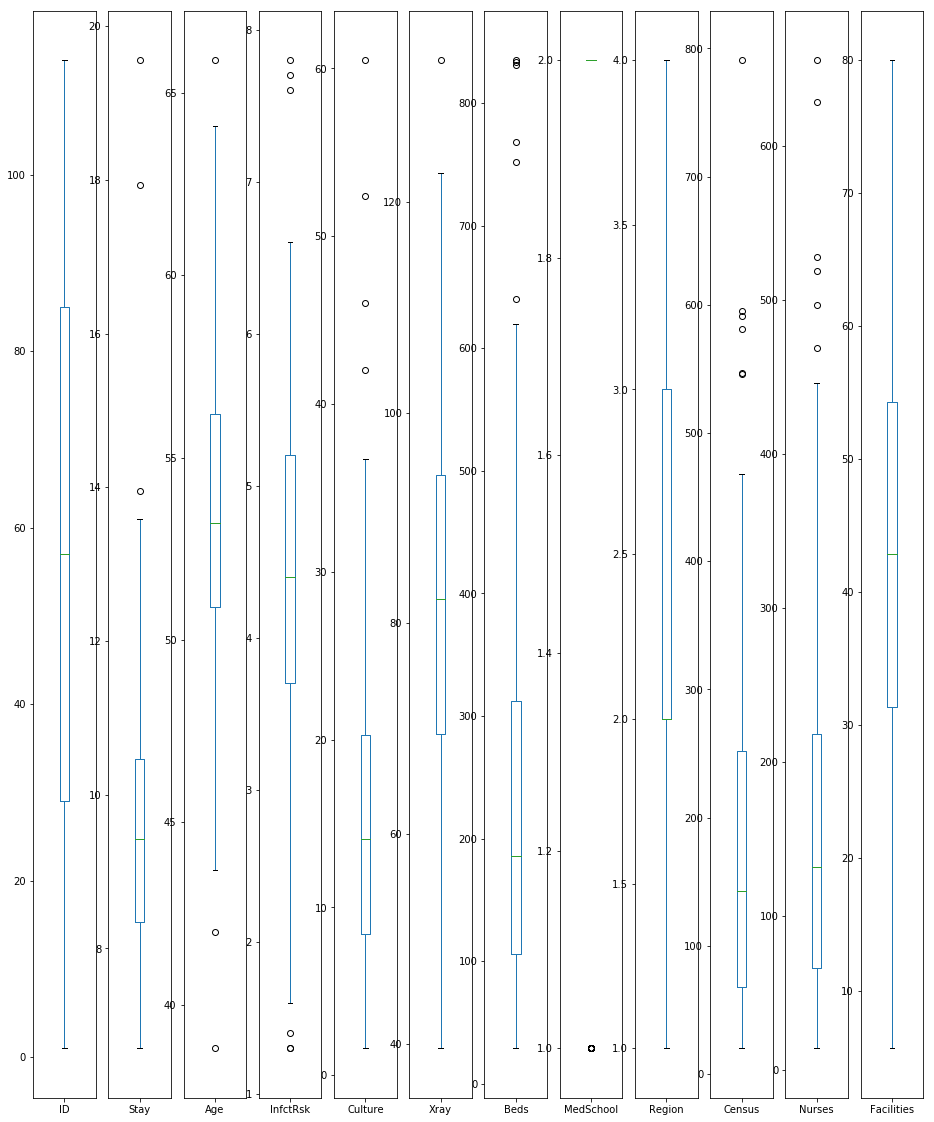

In [11]:
data.plot(kind='box', subplots=True, layout=(1,15), figsize=(20,20),sharex=False, sharey=False)
plt.show()

In [12]:
y = data['InfctRsk'].values
X = data.drop(columns = ['InfctRsk','ID'])

In [13]:
print(y.shape)
print(X.shape)

(113,)
(113, 10)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 10)
(34, 10)
(79,)
(34,)


In [15]:
lin_model = LinearRegression()
result = lin_model.fit(X_train, y_train)

In [16]:
from sklearn.metrics import mean_squared_error ,r2_score

In [17]:
y_pred = lin_model.predict(X_test)

In [18]:
t=mean_squared_error(y_test,y_pred)
print(t)

0.5977173170182751


In [19]:
from math import sqrt

In [20]:
sqrt(t)

0.7731217996009911

In [21]:
r2_score(y_test,y_pred)

0.6176810481587758

In [22]:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [23]:
X_train['InfctRsk'] = y_train

D:\Users\703237795\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
X_train.head()

,Stay,Age,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities,InfctRsk
99,10.15,51.9,16.4,59.2,568,1,3,452,371,62.9,6.2
53,12.07,43.7,52.4,105.3,157,2,2,115,76,31.4,7.8
61,11.18,51.0,18.8,55.9,595,1,2,546,392,68.6,5.7
82,7.63,52.1,11.6,61.1,197,2,4,109,110,45.7,5.5
68,9.61,52.4,6.9,87.2,487,2,3,404,220,48.6,4.5


In [25]:
import statsmodels.formula.api as sm

In [26]:
vif_cal(input_data=X_train, dependent_col="InfctRsk")

Stay  VIF =  3.18
Age  VIF =  1.34
Culture  VIF =  1.81
Xray  VIF =  1.48
Beds  VIF =  36.89
MedSchool  VIF =  1.88
Region  VIF =  1.85
Census  VIF =  37.3
Nurses  VIF =  8.36
Facilities  VIF =  3.39


In [27]:
y1 = data['InfctRsk'].values
X1 = data.drop(columns = ['InfctRsk','ID','Census'])

In [ ]:
print(y1.shape)
print(X1.shape)

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(79, 9)
(34, 9)
(79,)
(34,)


In [29]:
lin_model1 = LinearRegression()
result1 = lin_model.fit(X1_train, y1_train)

In [30]:
y1_pred = lin_model.predict(X1_test)

In [31]:
t1=mean_squared_error(y1_test,y1_pred)
print(t1)

0.6057689171045784


In [32]:
sqrt(t1)

0.7783115809909155

In [33]:
r2_score(y1_test,y1_pred)

0.6125309893968911

In [34]:
X1_train['InfctRsk'] =y1_train

D:\Users\703237795\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
vif_cal(input_data=X1_train, dependent_col="InfctRsk")

Stay  VIF =  2.64
Age  VIF =  1.3
Culture  VIF =  1.64
Xray  VIF =  1.48
Beds  VIF =  9.68
MedSchool  VIF =  1.8
Region  VIF =  1.84
Nurses  VIF =  8.22
Facilities  VIF =  3.39


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X.columns

In [ ]:
vif

In [ ]:
#Taking Age out from VIF